# Problem 2: Knapsack

In [53]:
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import numpy as np
import pandas as pd
import pickle as pk
import sklearn
import time
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, train_test_split, validation_curve, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample


output_directory = "C:/Users/JS/Desktop/machine_learning/Randomized_Optimization/Problem_1/output"

#### Utility Functions

In [138]:
def get_first_iteration(curve, fitness):
    result=np.where(curve==fitness)
    first = np.amin(result[0])
    return first+1

#### Problem Declaration

In [70]:
length=100

random_weight_list = np.random.randint(low=1,high=99,size=(length,))
random_weight_list = list(random_weight_list)
print(random_weight_list)

random_weight_list = np.random.randint(low=1,high=99,size=(length,))
random_weight_list = list(random_weight_list)
print(random_weight_list)


[2, 1, 73, 75, 79, 55, 36, 72, 87, 85, 49, 68, 76, 70, 29, 24, 75, 66, 79, 24, 49, 31, 71, 88, 57, 26, 61, 85, 81, 74, 80, 74, 65, 45, 67, 66, 36, 36, 26, 9, 33, 70, 65, 60, 42, 58, 88, 45, 56, 6]
[57, 50, 67, 1, 49, 90, 79, 80, 47, 12, 52, 61, 26, 48, 67, 25, 34, 71, 16, 54, 73, 47, 58, 60, 9, 10, 87, 85, 11, 63, 7, 10, 79, 50, 26, 96, 24, 10, 6, 20, 88, 46, 56, 44, 37, 57, 48, 24, 22, 89]


In [135]:
length=100

random_weight_list = np.random.randint(low=1,high=99,size=(length,))
random_weight_list = list(random_weight_list)
print(random_weight_list)

random_weight_list = np.random.randint(low=1,high=99,size=(length,))
random_weight_list = list(random_weight_list)
print(random_weight_list)


[53, 51, 26, 43, 22, 65, 56, 46, 61, 94, 72, 69, 98, 88, 61, 26, 37, 35, 88, 50, 78, 32, 50, 2, 8, 97, 83, 58, 34, 31, 39, 44, 52, 76, 54, 62, 17, 12, 69, 40, 62, 80, 13, 56, 74, 42, 85, 30, 98, 27, 40, 22, 51, 72, 95, 34, 54, 30, 10, 36, 32, 65, 10, 40, 86, 16, 19, 1, 89, 73, 25, 65, 61, 87, 50, 45, 96, 78, 32, 44, 2, 44, 6, 57, 46, 40, 57, 24, 59, 64, 93, 27, 46, 35, 43, 86, 40, 45, 14, 76]
[62, 11, 92, 60, 70, 74, 93, 45, 78, 53, 83, 18, 22, 22, 15, 71, 15, 91, 92, 24, 51, 79, 57, 52, 75, 45, 77, 32, 13, 79, 43, 38, 22, 97, 63, 84, 36, 68, 54, 15, 18, 22, 81, 79, 87, 45, 29, 42, 19, 76, 78, 78, 94, 87, 10, 92, 21, 55, 44, 7, 75, 52, 85, 32, 88, 33, 61, 74, 24, 15, 34, 46, 16, 17, 49, 40, 82, 35, 7, 38, 74, 27, 6, 92, 29, 75, 9, 41, 89, 39, 12, 37, 47, 21, 91, 84, 68, 12, 90, 47]


In [56]:
weight_limit = .3 * np.sum([29, 24, 15, 20, 36, 6, 45, 1, 18, 49, 35, 4, 40, 34, 6, 39, 49, 10, 27, 49, 33, 8, 7, 45, 27])
print(weight_limit)

196.79999999999998


In [133]:
len([29, 24, 15, 20, 36, 6, 45, 1, 18, 49, 35, 4, 40, 34, 6, 39, 49, 10, 27, 49, 33, 8, 7, 45, 27])

25

In [57]:
# '''
# EASY (length=5)

# Initialize Objects: Knapsack
#     - define fitness function
#     - define define an optimization problem
    
# Notes:
#     - max_val indicates number of times an item can be reused+1. (e.g. if max_val=2, each item can only be used once.
#     if max_val=6, each item can be used up to 5 times.)
#     - EASY version, when max_val=2, answer is [1, 1, 1, 0, 0] indicating sack should contain 3 items, weights 10, 20, 30. 
#     fitness = 24

# '''

# # define weights
# weights = [10, 20, 30, 50, 60]

# # define cost
# values = [10, 8, 6, 4, 2]

# # define max_weight_pct 
# max_weight_pct = 0.3

# # define fitness function object
# fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# # define an optimization problem object
# problem = mlrose.DiscreteOpt(length = 5, fitness_fn = fitness, maximize = True, max_val = 2)

# init_state=None

In [58]:
# '''
# Medium (length=10)

# Initialize Objects: Knapsack
#     - define fitness function
#     - define define an optimization problem

# '''

# # define weights
# weights = [10,5,2,8,15,5,8,10,8,2,1,7]

# # define cost
# values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 2]

# # define max_weight_pct 
# max_weight_pct = 0.3

# # define fitness function object
# fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# # define an optimization problem object
# problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness, maximize = True, max_val = 2)

# init_state=None

In [59]:
# '''
# HARD (length=15)

# Initialize Objects: Knapsack
#     - define fitness function
#     - define define an optimization problem

# '''

# # define weights
# weights = [7, 3, 45, 6, 1, 5, 16, 27, 7, 46, 25, 31, 18, 39, 33]

# # define cost
# values = [31, 33, 27, 49, 14, 21, 27, 41, 47, 29, 26, 13, 40, 47, 21]

# # define max_weight_pct 
# max_weight_pct = 0.3

# # define fitness function object
# fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# # define an optimization problem object
# problem = mlrose.DiscreteOpt(length = 15, fitness_fn = fitness, maximize = True, max_val = 2)

# init_state=None

In [60]:
# '''
# VERY HARD (length=20)

# Initialize Objects: Knapsack
#     - define fitness function
#     - define define an optimization problem

# '''

# # define weights
# weights = [34, 46, 33, 15, 34, 6, 6, 49, 18, 3, 27, 25, 45, 30, 6, 37, 45, 40, 30, 43]

# # define cost
# values = [40, 30, 33, 20, 36, 29, 49, 8, 30, 18, 19, 25, 38, 14, 36, 25, 5, 11, 28, 21]

# # define max_weight_pct 
# max_weight_pct = 0.4

# # define fitness function object
# fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# # define an optimization problem object
# problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True, max_val = 2)

# init_state=None

In [61]:
# '''
# VERY VERY HARD (length=25)

# Initialize Objects: Knapsack
#     - define fitness function
#     - define define an optimization problem

# '''

# # define weights
# weights = [29, 24, 15, 20, 36, 6, 45, 1, 18, 49, 35, 4, 40, 34, 6, 39, 49, 10, 27, 49, 33, 8, 7, 45, 27]

# # define values
# # values = [24, 14, 32, 2, 8, 45, 33, 19, 44, 34, 31, 39, 44, 12, 17, 12, 5, 40, 16, 13, 10, 42, 21, 30, 34, 27, 40, 22, 8, 31]
# values = [48, 2, 13, 15, 25, 6, 34, 13, 7, 42, 15, 39, 33, 17, 48, 3, 41, 28, 35, 43, 14, 25, 8, 14, 30]

# # define max_weight_pct 
# max_weight_pct = 0.3

# # define fitness function object
# fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# # define an optimization problem object
# problem = mlrose.DiscreteOpt(length = 25, fitness_fn = fitness, maximize = True, max_val = 2)

In [71]:
'''
VERY VERY VERY HARD (length=50)

Initialize Objects: Knapsack
    - define fitness function
    - define define an optimization problem

'''

# define weights
weights = [2, 1, 73, 75, 79, 55, 36, 72, 87, 85, 49, 68, 76, 70, 29, 24, 75, 66, 79, 24, 49, 31, 71, 88, 57, 26, 61, 85, 81, 74, 80, 74, 65, 45, 67, 66, 36, 36, 26, 9, 33, 70, 65, 60, 42, 58, 88, 45, 56, 6]

# define values
values = [57, 50, 67, 1, 49, 90, 79, 80, 47, 12, 52, 61, 26, 48, 67, 25, 34, 71, 16, 54, 73, 47, 58, 60, 9, 10, 87, 85, 11, 63, 7, 10, 79, 50, 26, 96, 24, 10, 6, 20, 88, 46, 56, 44, 37, 57, 48, 24, 22, 89]
# define max_weight_pct 
max_weight_pct = 0.5

# define fitness function object
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# define an optimization problem object
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)

#### Randomized Hill Climbing

In [134]:
problem

[1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 0 1 1]
1589.0


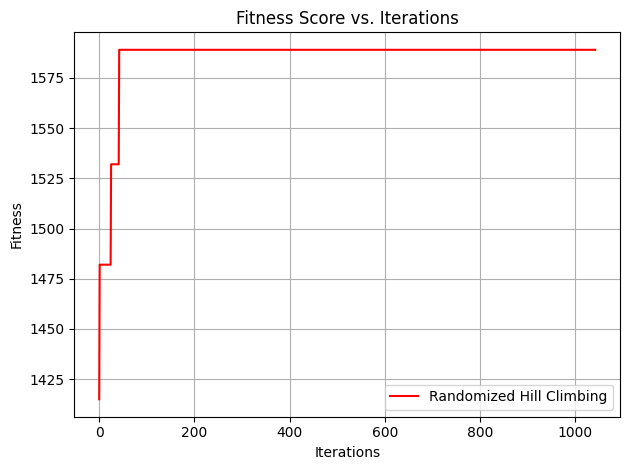

Iteration where convergence occurs:  43


In [108]:
'''
Randomized Hill Climbing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.random_hill_climb

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=1000, max_iters=5000, restarts=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Randomized Hill Climbing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 0 1 1]
1589.0


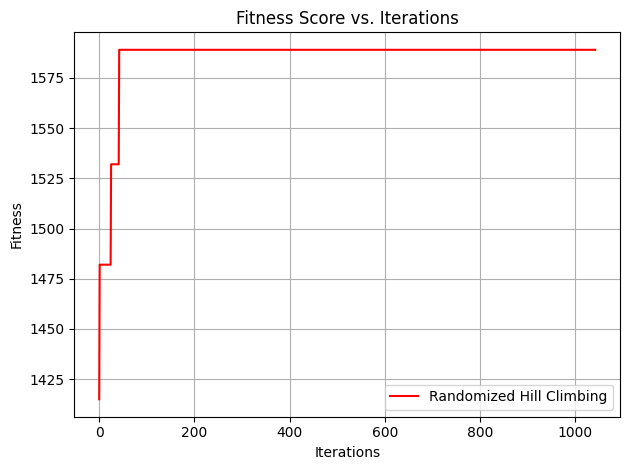

Iteration where convergence occurs:  43


In [109]:
'''
Randomized Hill Climbing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.random_hill_climb

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=1000, max_iters=5000, restarts=5000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Randomized Hill Climbing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0]
334.0


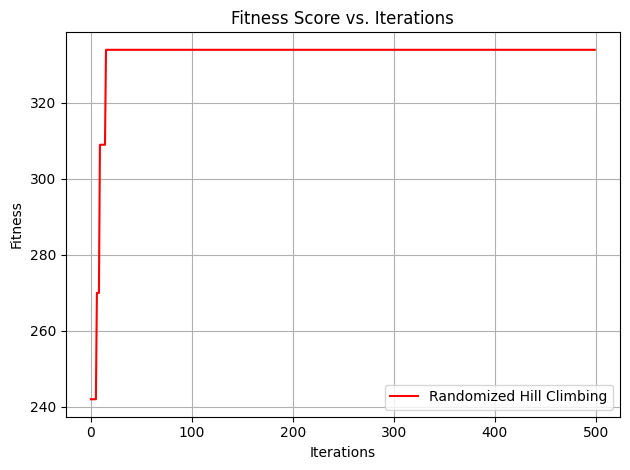

Iteration where convergence occurs:  16


In [22]:
'''
Randomized Hill Climbing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.random_hill_climb

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=1000, max_iters=500, restarts=5000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Randomized Hill Climbing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

In [ ]:
'''
Randomized Hill Climbing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.random_hill_climb

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=1000, max_iters=1000, restarts=3000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Randomized Hill Climbing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

In [ ]:
'''
Randomized Hill Climbing - Runner

Example usage:
    experiment_name = 'example_experiment'
    problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
    rhc = RHCRunner(problem=problem,
                    experiment_name=experiment_name,
                    output_directory=OUTPUT_DIRECTORY,
                    seed=SEED,
                    iteration_list=2 ** np.arange(10),
                    max_attempts=5000,
                    restart_list=[25, 75, 100])   
    # the two data frames will contain the results
    df_run_stats, df_run_curves = rhc.run() 

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/rhc_runner.py

'''

# runner = mlrose.RHCRunner(problem=problem,
#                           experiment_name="knapsack_rhc",
#                           output_directory=output_directory,
#                           seed=37,
#                           iteration_list=2 ** np.arange(10),
#                           max_attempt=500,
#                           restart_list=[500, 1000, 5000, 10000],
#                           generate_curves=True)
# df_run_stats, df_run_curves = runner.run()


# runner = mlrose.SARunner(problem=problem,
#                          experiment_name="knapsack_sa",
#                          output_directory=output_directory,
#                          seed=37,
#                          iteration_list=[5000],
#                          max_attempt=1000,
#                          temperature_list=[200, 300, 400, 500],
#                          decay_list=[mlrose.GeomDecay, mlrose.ExpDecay, mlrose.ArithDecay])

In [ ]:
# # get instance with highest fitness and lowest time
# print("Row with Max Fitness & Min Time: ")
# df_max_fit = df_run_curves[df_run_curves.Fitness == df_run_curves.Fitness.max()]
# df_min_time = df_max_fit[df_max_fit.Time == df_max_fit.Time.min()]
# print(df_min_time)

#### Simulated Annealing

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 0 0 1]
1757.0


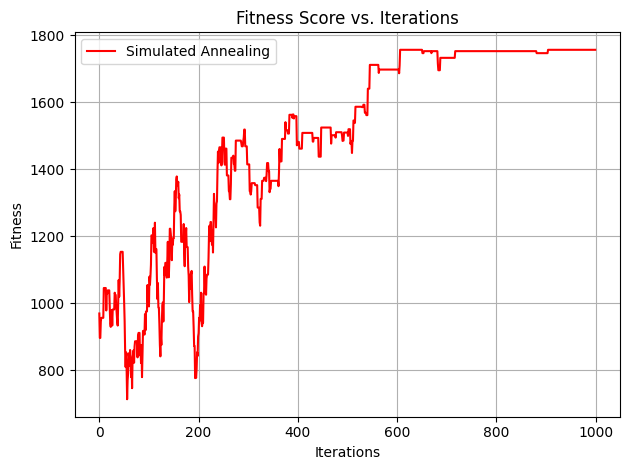

Iteration where convergence occurs:  607


In [114]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=300, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 0 1]
1751.0


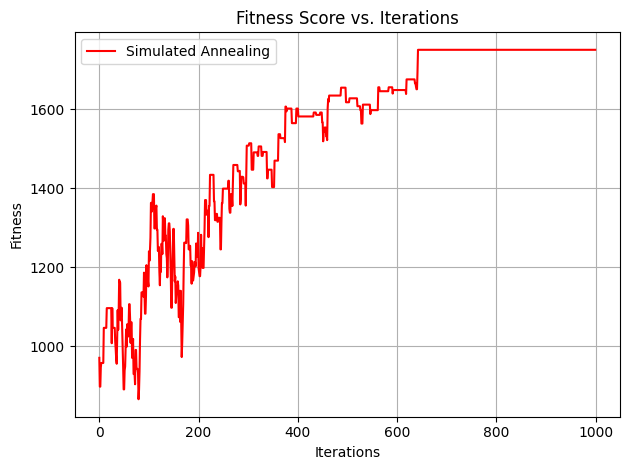

Iteration where convergence occurs:  643


In [115]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=200, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 1 0 1]
1630.0


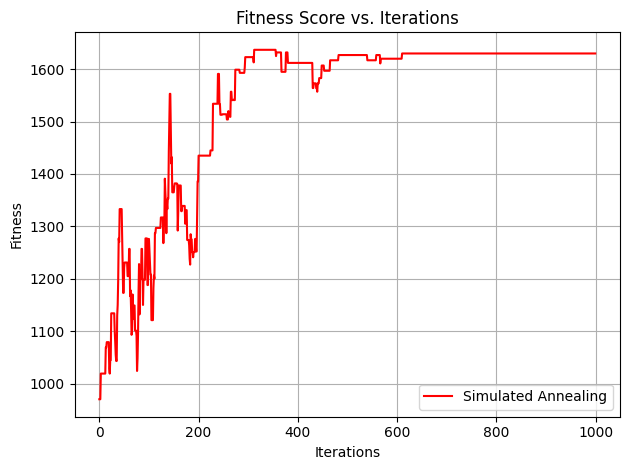

Iteration where convergence occurs:  611


In [116]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=100, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1
 0 0 1 1 1 1 0 0 0 1 1 0 1]
1577.0


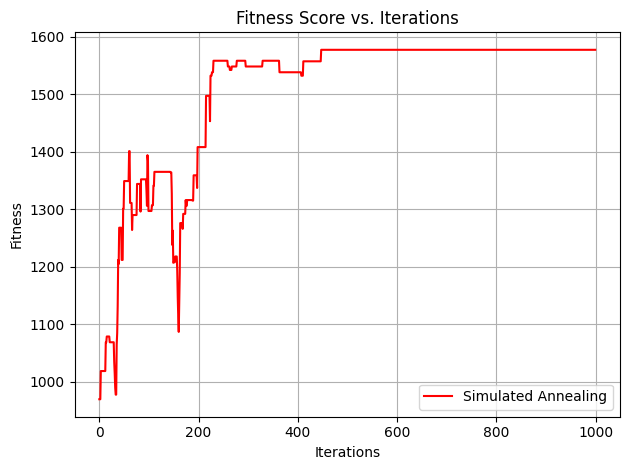

Iteration where convergence occurs:  448


In [117]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=50, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 0 0 0 1]
1729.0


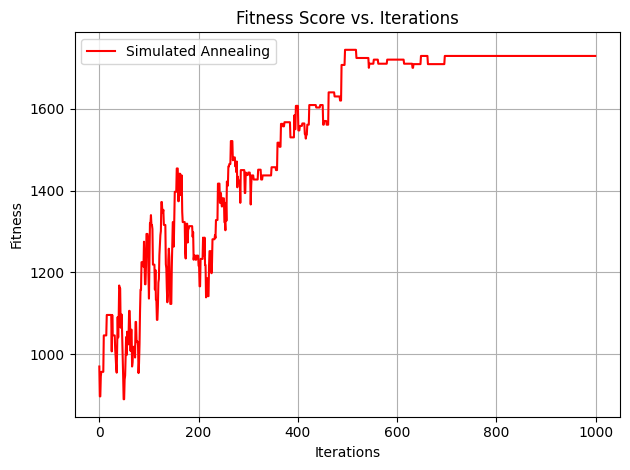

Iteration where convergence occurs:  649


In [118]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=150, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 0 1]
1751.0


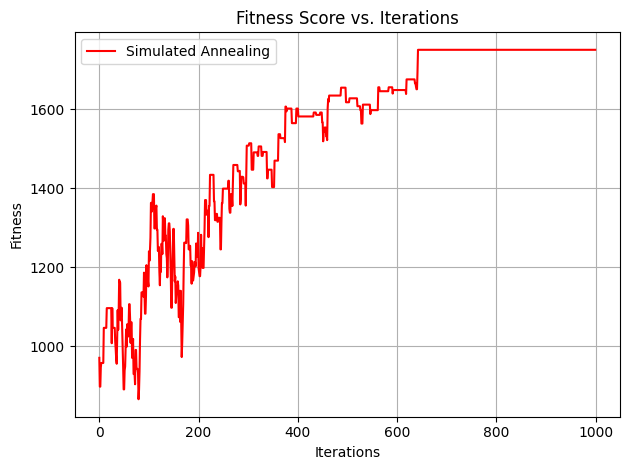

Iteration where convergence occurs:  643


In [119]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=200, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=2000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 0 1]
1751.0


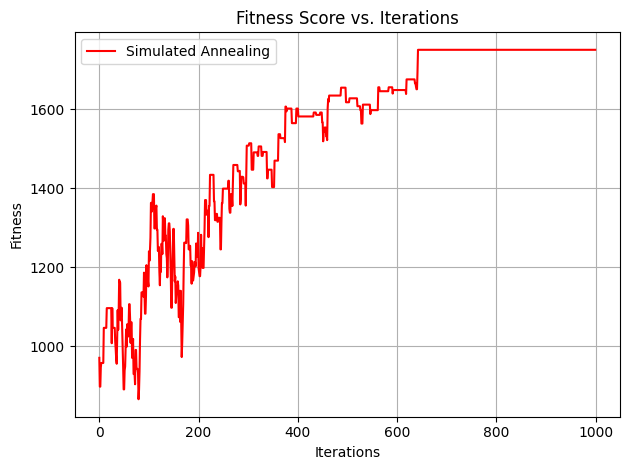

Iteration where convergence occurs:  643


In [120]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=200, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=500, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 0 0 1]
1757.0


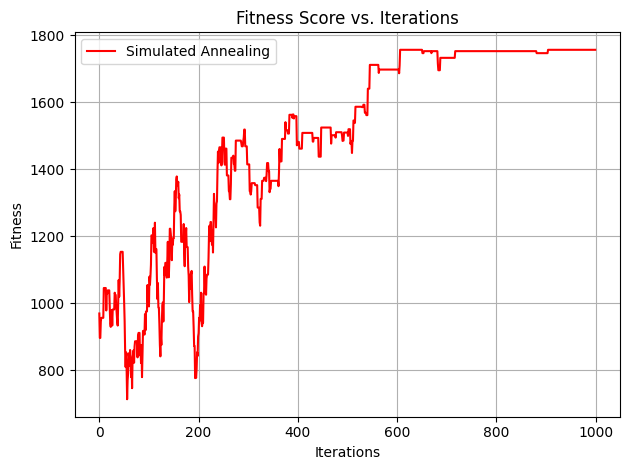

Iteration where convergence occurs:  607


In [123]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=300, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

In [121]:
'''
Simulated Annealing - Runner

Example usage:
    experiment_name = 'example_experiment'
    problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
    
    # note that you can also initialize a temperature_list this way
    # temperature_list = [mlrose_hiive.GeomDecay(init_temp=t, decay=d) for (t, d) in [(1, 0.99), (1e2, 0.999)]]
    # if you use this form, the decay_list parameter is ignored.
    sa = SARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory=OUTPUT_DIRECTORY,
                  seed=SEED,
                  iteration_list=2 ** np.arange(14),
                  max_attempts=5000,
                  temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
                  decay_list=[mlrose_hiive.GeomDecay])
    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run() 
    
Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

runner = mlrose.SARunner(problem=problem,
                         experiment_name="knapsack_sa",
                         output_directory=output_directory,
                         seed=37,
                         iteration_list=[1000],
                         max_attempt=1000,
                         temperature_list=[5, 10, 50, 100, 200, 300],
                         decay_list=[mlrose.GeomDecay, mlrose.ExpDecay, mlrose.ArithDecay])

df_run_stats, df_run_curves = runner.run()

In [122]:
'''
Simulated Annealing - Runner Parse

'''

# get instance with highest fitness and lowest time
print("Row with Max Fitness & Min Time: ")
df_max_fit = df_run_curves[df_run_curves.Fitness == df_run_curves.Fitness.max()]
df_min_time = df_max_fit[df_max_fit.Time == df_max_fit.Time.min()]
print(df_min_time)

Row with Max Fitness & Min Time: 
       Iteration      Time  Fitness  FEvals Temperature  max_iters  \
14614        640  0.000064   1757.0   918.0         300       1000   

       max_attempt  
14614         1000  


In [124]:
'''
Simulated Annealing - Runner

Example usage:
    experiment_name = 'example_experiment'
    problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
    
    # note that you can also initialize a temperature_list this way
    # temperature_list = [mlrose_hiive.GeomDecay(init_temp=t, decay=d) for (t, d) in [(1, 0.99), (1e2, 0.999)]]
    # if you use this form, the decay_list parameter is ignored.
    sa = SARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory=OUTPUT_DIRECTORY,
                  seed=SEED,
                  iteration_list=2 ** np.arange(14),
                  max_attempts=5000,
                  temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
                  decay_list=[mlrose_hiive.GeomDecay])
    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run() 
    
Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

runner = mlrose.SARunner(problem=problem,
                         experiment_name="knapsack_sa",
                         output_directory=output_directory,
                         seed=37,
                         iteration_list=[1000],
                         max_attempt=5000,
                         temperature_list=[5, 10, 50, 100, 200, 300],
                         decay_list=[mlrose.GeomDecay, mlrose.ExpDecay, mlrose.ArithDecay])

df_run_stats, df_run_curves = runner.run()

In [125]:
'''
Simulated Annealing - Runner Parse

'''

# get instance with highest fitness and lowest time
print("Row with Max Fitness & Min Time: ")
df_max_fit = df_run_curves[df_run_curves.Fitness == df_run_curves.Fitness.max()]
df_min_time = df_max_fit[df_max_fit.Time == df_max_fit.Time.min()]
print(df_min_time)

Row with Max Fitness & Min Time: 
       Iteration      Time  Fitness  FEvals Temperature  max_iters  \
14614        640  0.000063   1757.0   918.0         300       1000   

       max_attempt  
14614         5000  


In [ ]:
'''
Simulated Annealing

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing

Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/sa_runner.py

'''

# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=300, exp_const=0.005)
# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                                     random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Simulated Annealing")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

#### Genetic Algorithm

[1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 0]
1046.0


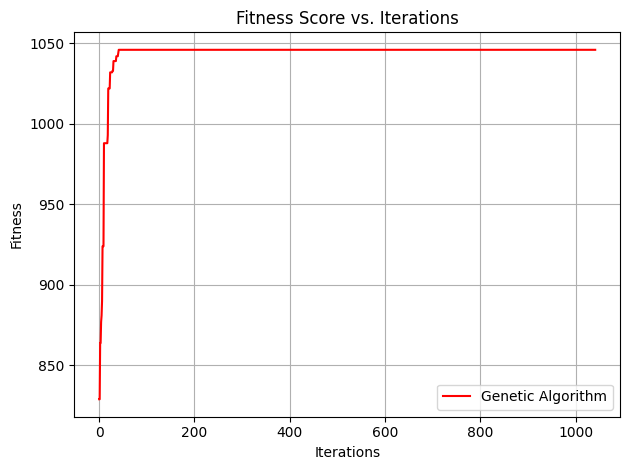

Iteration where convergence occurs:  42


In [63]:
'''
Genetic Algorithm

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.genetic_alg

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=500, mutation_prob=0.6, max_attempts=1000, max_iters=5000,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Genetic Algorithm")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 1]
1822.0


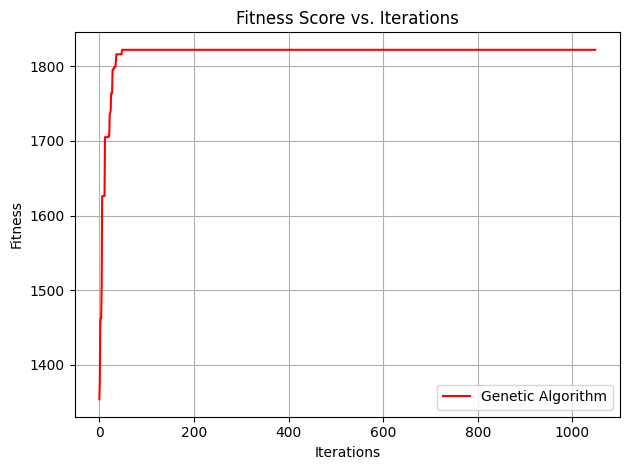

Iteration where convergence occurs:  49


In [72]:
'''
Genetic Algorithm

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.genetic_alg

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=300, mutation_prob=0.6, max_attempts=1000, max_iters=5000,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Genetic Algorithm")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 1]
1822.0


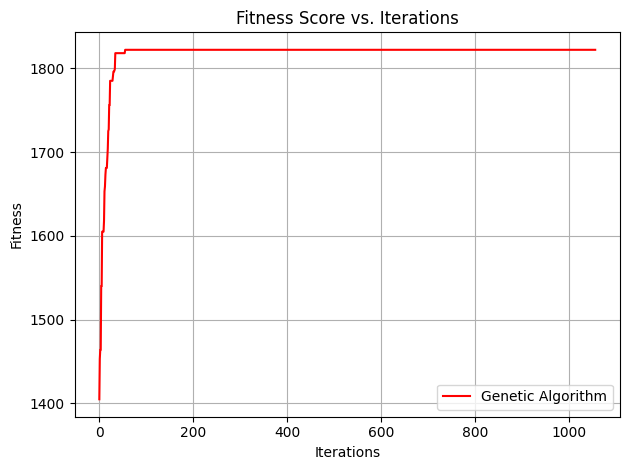

Iteration where convergence occurs:  56


In [128]:
'''
Genetic Algorithm

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.genetic_alg

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=100, mutation_prob=0.4, max_attempts=1000, max_iters=5000,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="Genetic Algorithm")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

In [126]:
'''
Genetic Algorithm - Runner

Example usage:
    experiment_name = 'example_experiment'
    problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
    ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory=OUTPUT_DIRECTORY,
                  seed=SEED,
                  iteration_list=2 ** np.arange(12),
                  max_attempts=1000,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])
                  
    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
    
Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/ga_runner.py

'''

runner = mlrose.GARunner(problem=problem,
                         experiment_name="knapsack_ga",
                         output_directory=output_directory,
                         seed=37,
                         iteration_list=[5000],
                         max_attempt=1000,
                         population_sizes=[100, 300, 500],
                         mutation_rates=[0.3, 0.4, 0.5, 0.6])


df_run_stats, df_run_curves = runner.run()

In [127]:
'''
Genetic Algorithm - Runner Parse

'''

# get instance with highest fitness and lowest time
print("Row with Max Fitness & Min Time: ")
df_max_fit = df_run_curves[df_run_curves.Fitness == df_run_curves.Fitness.max()]
df_min_time = df_max_fit[df_max_fit.Time == df_max_fit.Time.min()]
print(df_min_time)

Row with Max Fitness & Min Time: 
      Iteration      Time  Fitness   FEvals  Population Size  Mutation Rate  \
1112        556  0.001428   1822.0  56278.0              100            0.4   

      max_iters  max_attempt  
1112       5000         1000  


#### MIMIC

[1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 1 1 0 0 0 1]
1785.0


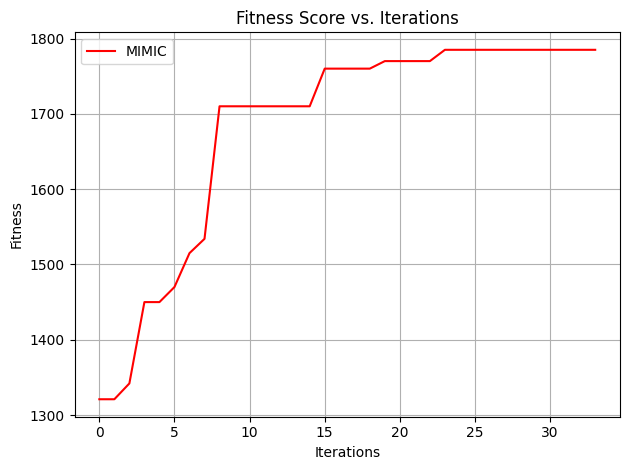

Iteration where convergence occurs:  24


In [75]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.5, max_attempts=10, max_iters=500,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 1 1 0 0 0 1]
1785.0


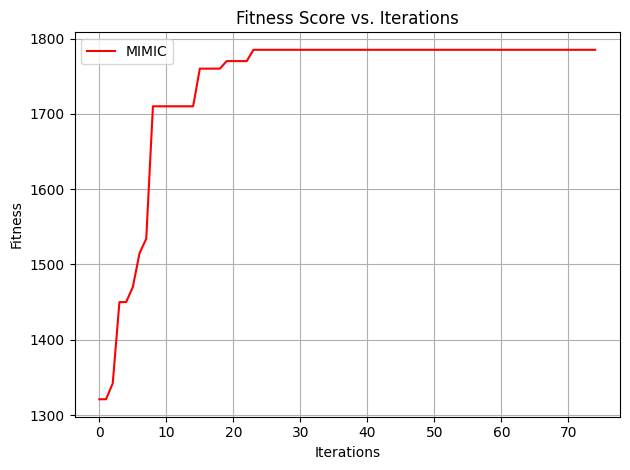

Iteration where convergence occurs:  24


In [77]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.5, max_attempts=10000000000, max_iters=75,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 1]
1527.0


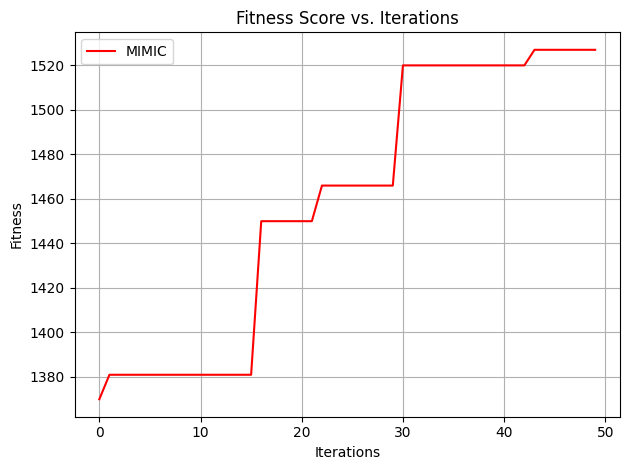

Iteration where convergence occurs:  44


In [79]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.9, max_attempts=50, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 1]
1527.0


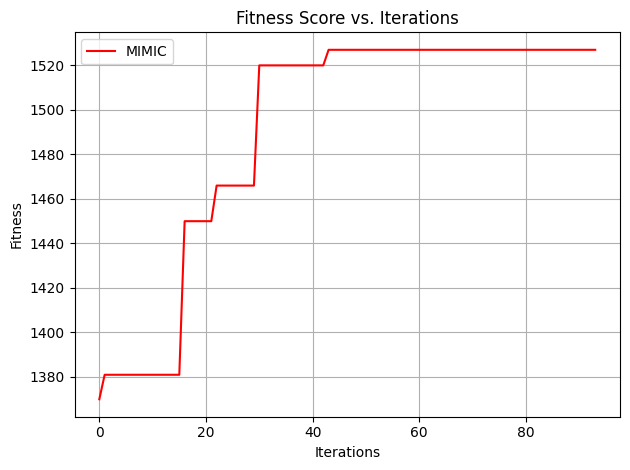

Iteration where convergence occurs:  44


In [80]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.9, max_attempts=50, max_iters=100,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 1]
1527.0


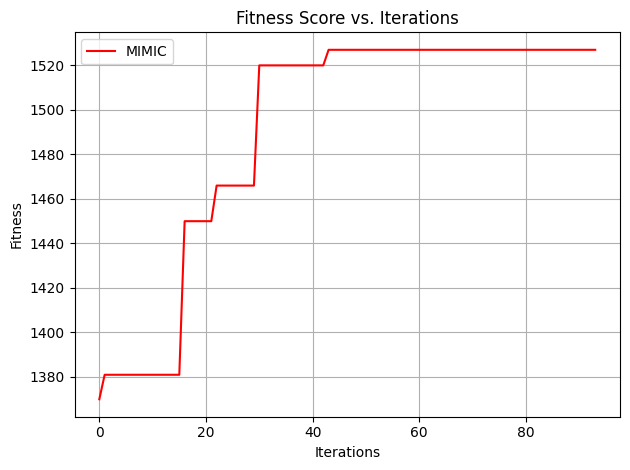

Iteration where convergence occurs:  44


In [81]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.95, max_attempts=50, max_iters=100,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 0 1]
1686.0


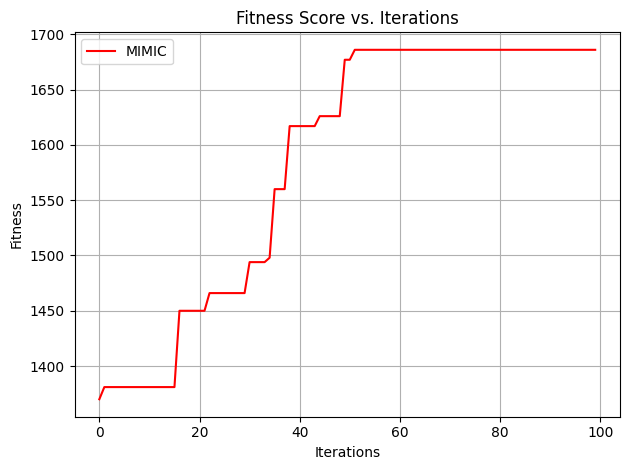

Iteration where convergence occurs:  52


In [82]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.7, max_attempts=50, max_iters=100,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 1 0 0 0 0 1]
1784.0


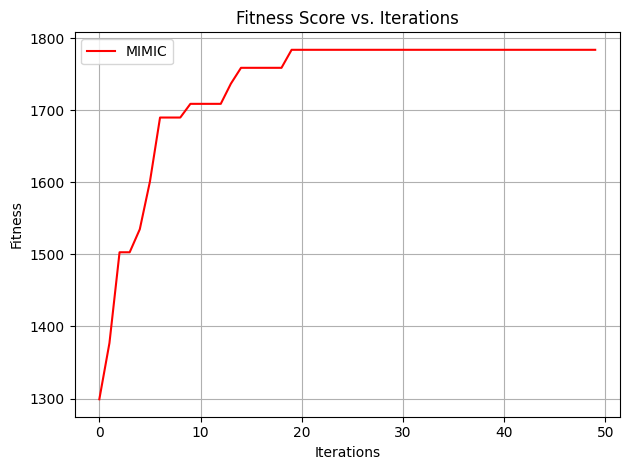

Iteration where convergence occurs:  20


In [83]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.4, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1
 1 0 1 1 0 0 1 1 1 1 1 0 1]
1576.0


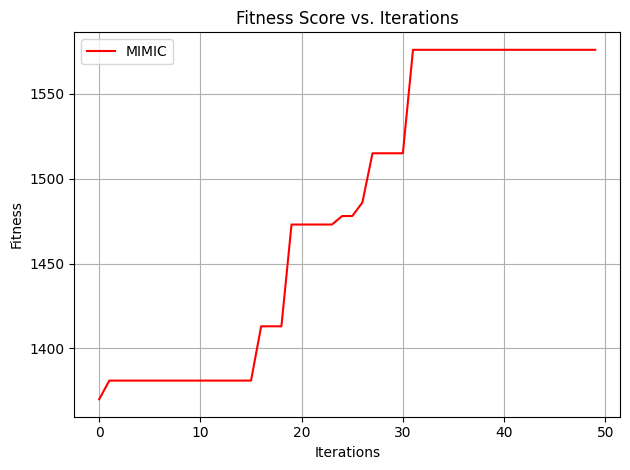

Iteration where convergence occurs:  32


In [84]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.6, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 1]
1801.0


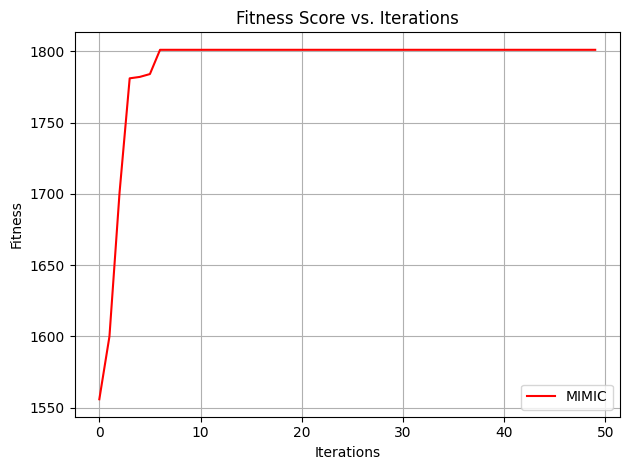

Iteration where convergence occurs:  7


In [85]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.1, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0
 0 0 1 1 1 0 0 1 1 0 1 1 1]
1722.0


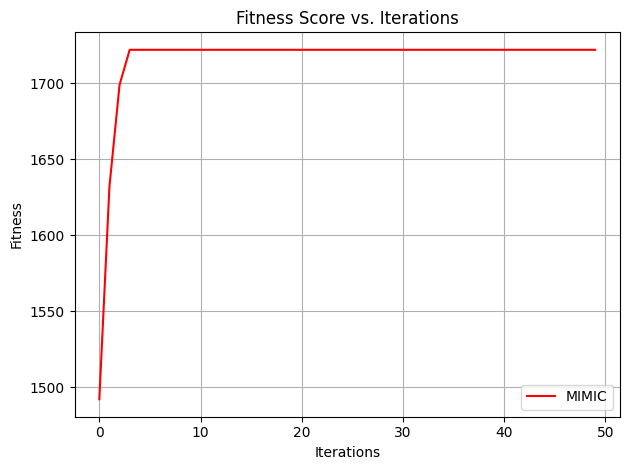

Iteration where convergence occurs:  4


In [86]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.05, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1]
1804.0


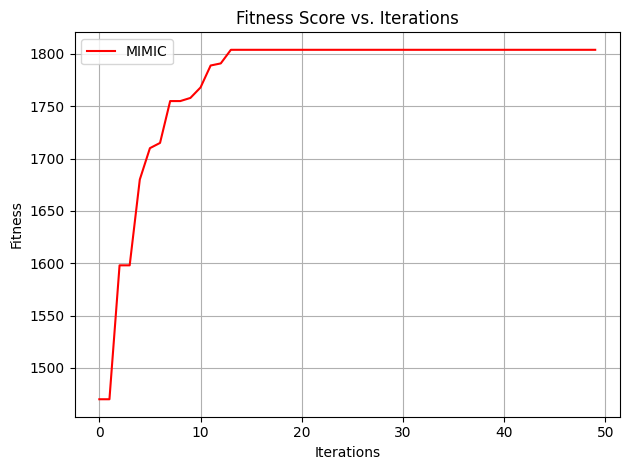

Iteration where convergence occurs:  14


In [87]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.25, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 0 1]
1810.0


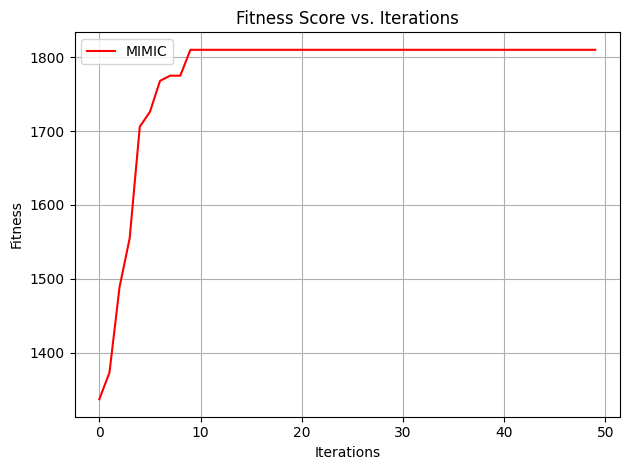

Iteration where convergence occurs:  10


In [88]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.3, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 1 0 0 0 0 1]
1784.0


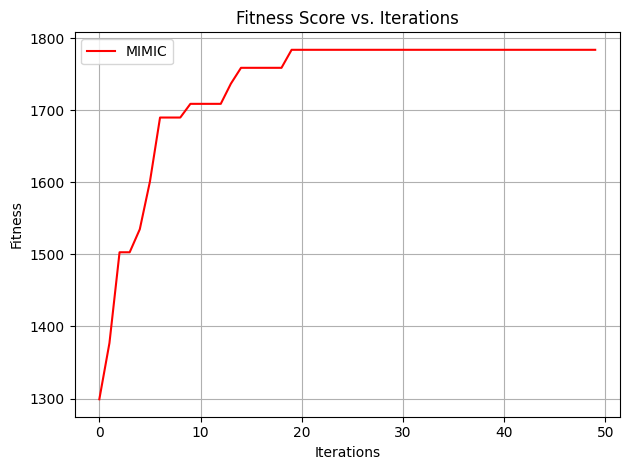

Iteration where convergence occurs:  20


In [89]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.4, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 0 1 1 1]
1785.0


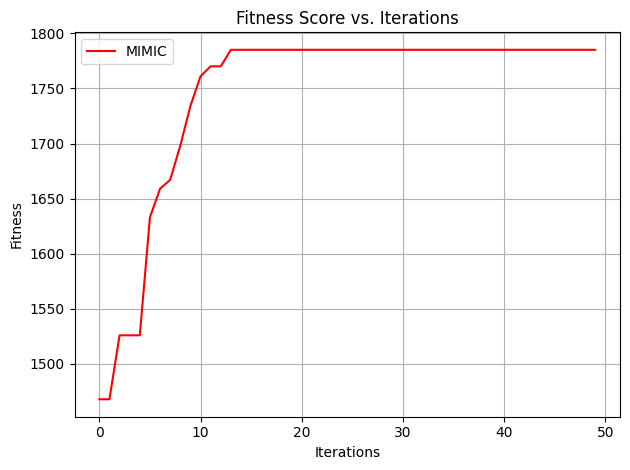

Iteration where convergence occurs:  14


In [90]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.35, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 0 1 1 1 1 1 1 1 1 0 0 1]
1776.0


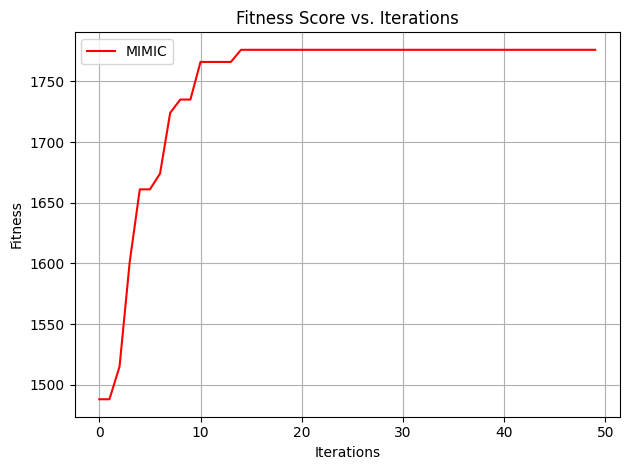

Iteration where convergence occurs:  15


In [91]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.31, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 1 0 0 0 1]
1761.0


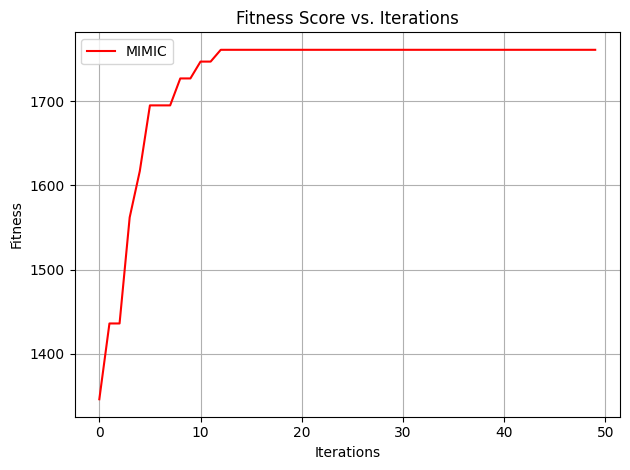

Iteration where convergence occurs:  13


In [92]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.28, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 1 0 1]
1745.0


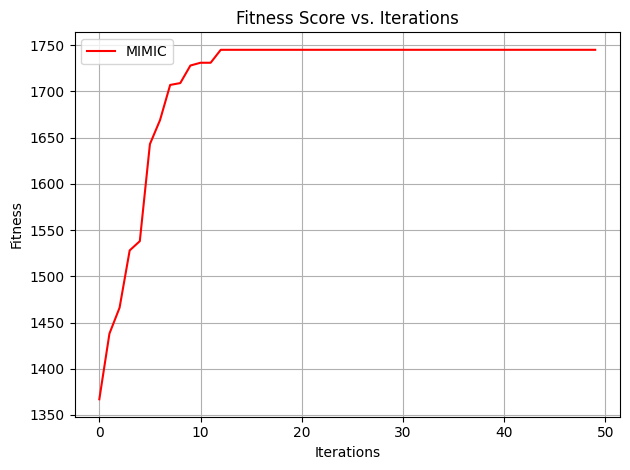

Iteration where convergence occurs:  13


In [93]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=100, keep_pct=0.23, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 1 1 1 1 1 1 0 0 0 1]
1818.0


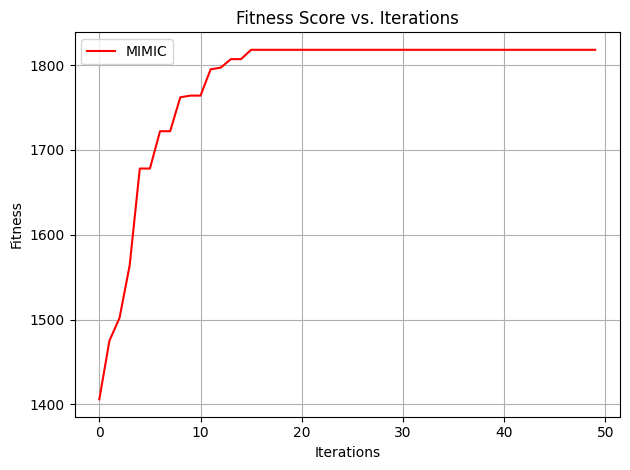

Iteration where convergence occurs:  16


In [94]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.25, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 1 0 1 0 1 0 1]
1790.0


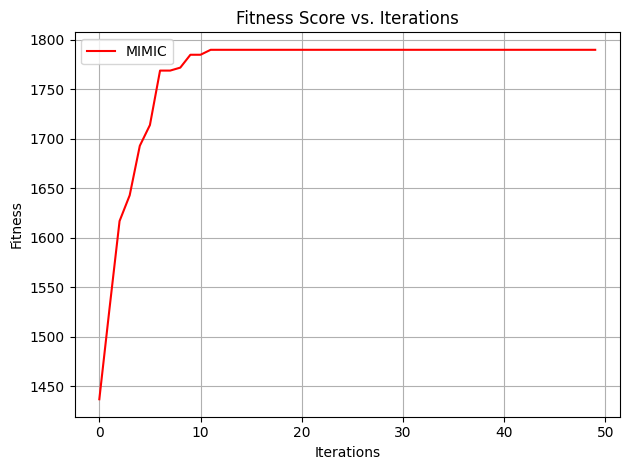

Iteration where convergence occurs:  12


In [95]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 1 0 1 0 1 0 1]
1790.0


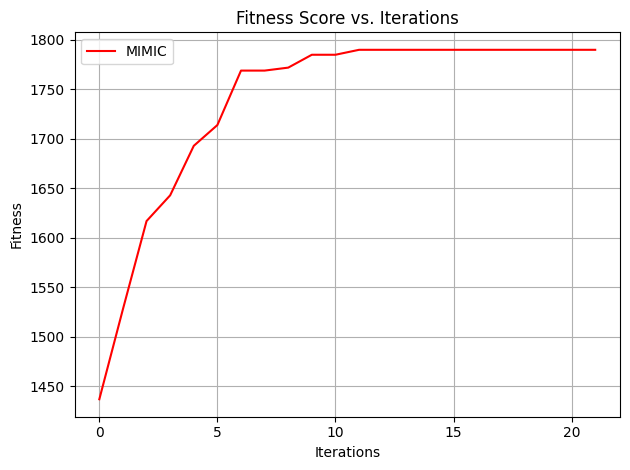

Iteration where convergence occurs:  12


In [96]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 1]
1822.0


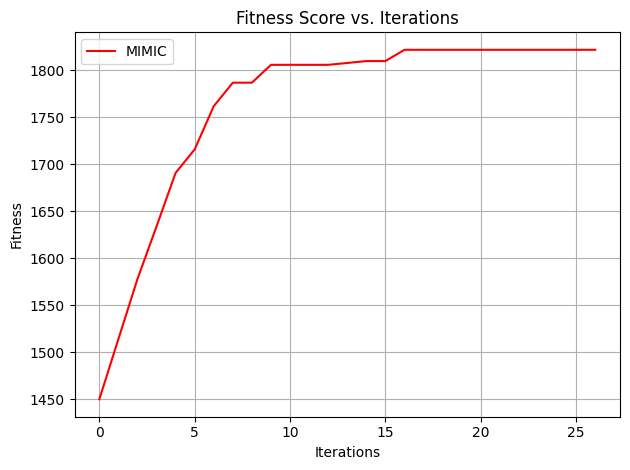

Iteration where convergence occurs:  17


In [97]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=250, keep_pct=0.25, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 0 0 0 1]
1803.0


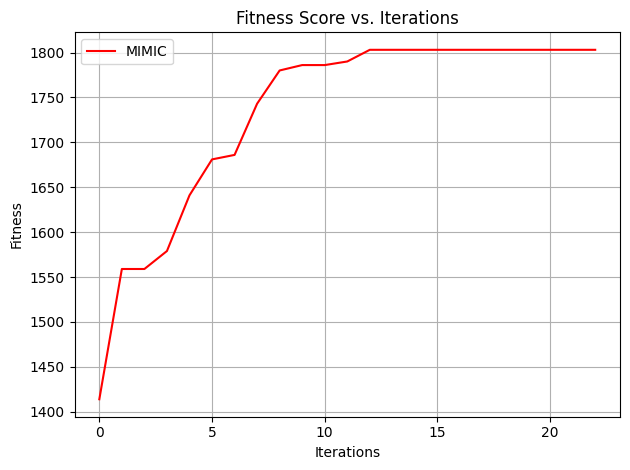

Iteration where convergence occurs:  13


In [98]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=300, keep_pct=0.25, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 1 1 1 1 1 1 0 0 0 1]
1818.0


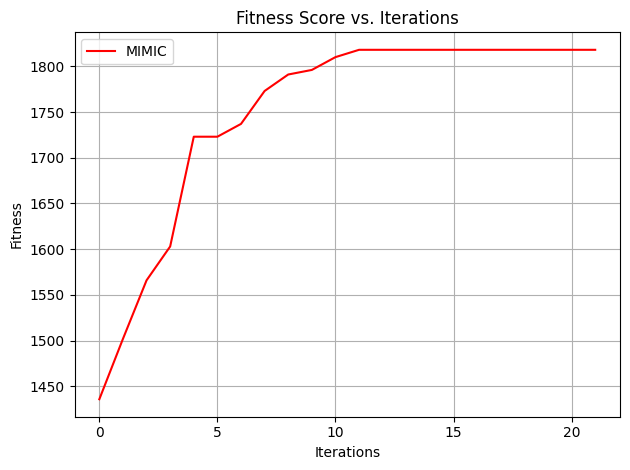

Iteration where convergence occurs:  12


In [99]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=225, keep_pct=0.25, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 0 0 0 1]
1816.0


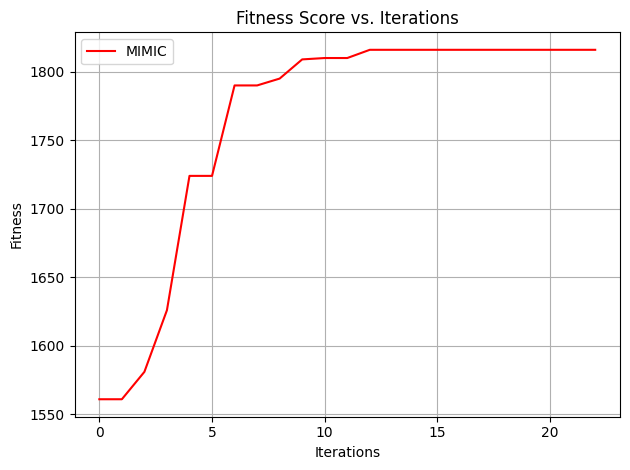

Iteration where convergence occurs:  13


In [100]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=275, keep_pct=0.25, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

In [ ]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=275, keep_pct=0.25, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 1 1 1 1 1 1 0 0 0 1]
1818.0


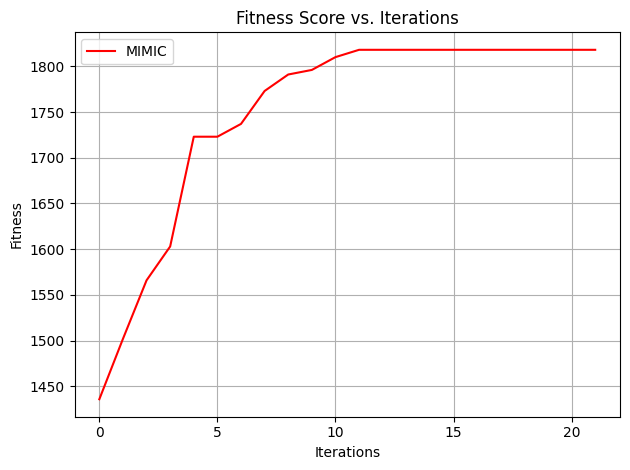

Iteration where convergence occurs:  12


In [101]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=225, keep_pct=0.25, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 1]
1822.0


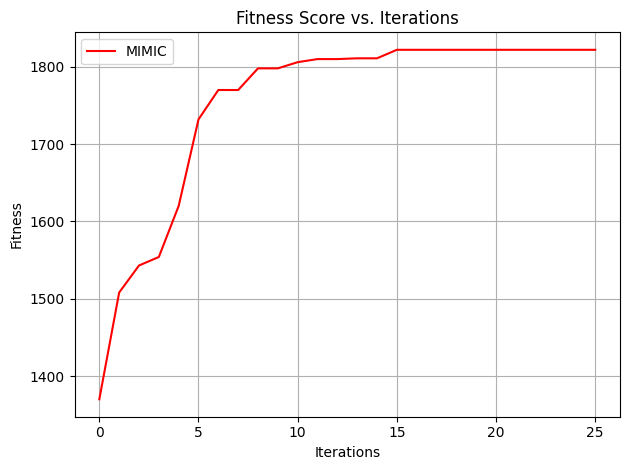

Iteration where convergence occurs:  16


In [102]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=240, keep_pct=0.25, max_attempts=10, max_iters=50,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

[1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 1]
1822.0


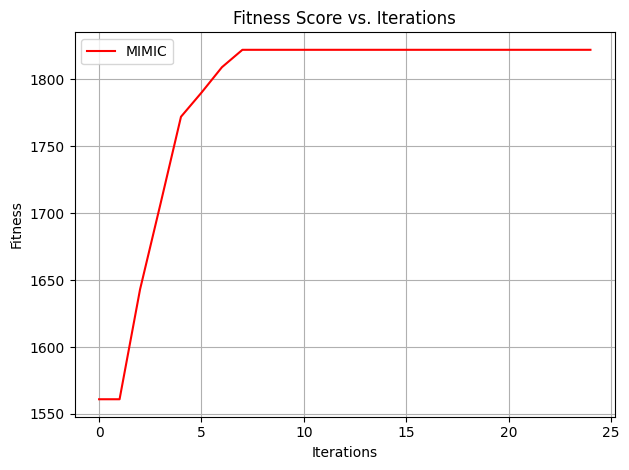

Iteration where convergence occurs:  8


In [129]:
'''
MIMIC

Sources:
- https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness
- https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic

'''

# select and run randomized optimization algorithm
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=245, keep_pct=0.15, max_attempts=25, max_iters=25,
                                                    random_state=37, curve=True)

print(best_state)
print(best_fitness)

# plot and show
plt.plot(fitness_curve[:,0], color="red", label="MIMIC")
plt.title("Fitness Score vs. Iterations")
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

conv_iter = get_first_iteration(fitness_curve, best_fitness)
print("Iteration where convergence occurs: ", conv_iter)

In [106]:
'''
MIMIC - Runner

Example usage:
    experiment_name = 'example_experiment'
    problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
    mmc = MIMICRunner(problem=problem,
                      experiment_name=experiment_name,
                      output_directory=OUTPUT_DIRECTORY,
                      seed=SEED,
                      iteration_list=2 ** np.arange(10),
                      max_attempts=500,
                      keep_percent_list=[0.25, 0.5, 0.75])
                      
    # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
    
Sources: https://github.com/hiive/mlrose/blob/master/mlrose_hiive/runners/mimic_runner.py

'''

runner = mlrose.MIMICRunner(problem=problem,
                            experiment_name="knapsack_mimic",
                            output_directory=output_directory,
                            seed=37,
                            iteration_list=[25],
                            max_attempt=25,
                            keep_percent_list= np.arange(0.1, 0.70, .05),
                            population_sizes=np.arange(200, 270, 5),
                           )

df_run_stats, df_run_curves = runner.run()

In [107]:
'''
MIMIC - Runner Parse

'''

# get instance with highest fitness and lowest time
print("Row with Max Fitness & Min Time: ")
df_max_fit = df_run_curves[df_run_curves.Fitness == df_run_curves.Fitness.max()]
df_min_time = df_max_fit[df_max_fit.Time == df_max_fit.Time.min()]
print(df_min_time)

Row with Max Fitness & Min Time: 
      Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
2842          8  2.823209   1822.0  2220.0           False              245   

      Keep Percent  max_iters  max_attempt  
2842          0.15         25           25  


### Comparison of All 4 Search Algorithms

RHC - Total Testing Time: 12.87109s
Fitness Score:  1589.0
Iteration where convergence occurs:  43
SA - Total Testing Time: 0.031s
Fitness Score:  1757.0
Iteration where convergence occurs:  607
GA - Total Testing Time: 8.403s
Fitness Score:  1822.0
Iteration where convergence occurs:  49
MIMIC - Total Testing Time: 7.64101s
Fitness Score:  1822.0
Iteration where convergence occurs:  8


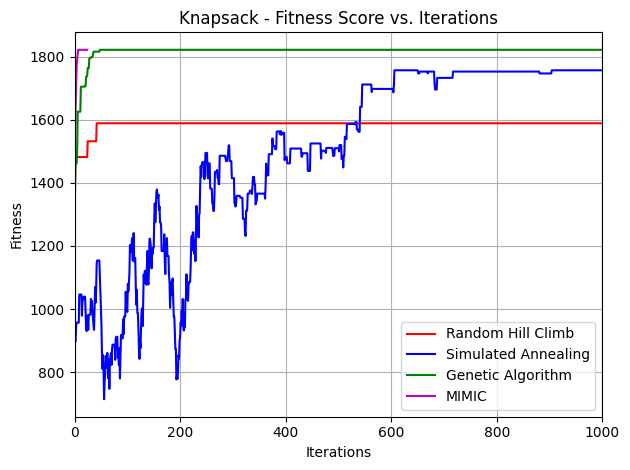

In [146]:
'''
Comparison of All 4 Search Algorithms (OPTIMIZED)

'''

# define weights
weights = [2, 1, 73, 75, 79, 55, 36, 72, 87, 85, 49, 68, 76, 70, 29, 24, 75, 66, 79, 24, 49, 31, 71, 88, 57, 26, 61, 85, 81, 74, 80, 74, 65, 45, 67, 66, 36, 36, 26, 9, 33, 70, 65, 60, 42, 58, 88, 45, 56, 6]

# define values
values = [57, 50, 67, 1, 49, 90, 79, 80, 47, 12, 52, 61, 26, 48, 67, 25, 34, 71, 16, 54, 73, 47, 58, 60, 9, 10, 87, 85, 11, 63, 7, 10, 79, 50, 26, 96, 24, 10, 6, 20, 88, 46, 56, 44, 37, 57, 48, 24, 22, 89]
# define max_weight_pct 
max_weight_pct = 0.5

# define fitness function object
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# define an optimization problem object
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)


# random hill climb
# start timer for testing
start = time.time()
rhc = mlrose.random_hill_climb(problem, max_attempts=1000, max_iters=5000, restarts=1000,
                                                     random_state=37, curve=True)
bf_rhc = rhc[1]
fc_rhc = rhc[2]
# end timer for testing
end = time.time()
# print total time for testing
print(f"RHC - Total Testing Time: {round(end-start, 5)}s")
conv_iter = get_first_iteration(fc_rhc, bf_rhc)
print("Fitness Score: ", bf_rhc)
print("Iteration where convergence occurs: ", conv_iter)


# simulated annealing
# start timer for testing
start = time.time()
# define decay schedule (ArithDecay, GeomDecay, ExpDecay)
schedule = mlrose.ExpDecay(init_temp=300, exp_const=0.005)
sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=5000,
                                                     random_state=37, curve=True)
bf_sa = sa[1]
fc_sa = sa[2]
# end timer for testing
end = time.time()
# print total time for testing
print(f"SA - Total Testing Time: {round(end-start, 5)}s")
conv_iter = get_first_iteration(fc_sa, bf_sa)
print("Fitness Score: ", bf_sa)
print("Iteration where convergence occurs: ", conv_iter)


# genetic algorithm
# start timer for testing
start = time.time()
ga = mlrose.genetic_alg(problem, pop_size=300, mutation_prob=0.6, max_attempts=1000, max_iters=5000,
                                                    random_state=37, curve=True)
bf_ga = ga[1]
fc_ga = ga[2]
# end timer for testing
end = time.time()
# print total time for testing
print(f"GA - Total Testing Time: {round(end-start, 5)}s")
conv_iter = get_first_iteration(fc_ga, bf_ga)
print("Fitness Score: ", bf_ga)
print("Iteration where convergence occurs: ", conv_iter)


# MIMIC
# start timer for testing
start = time.time()
mimic = mlrose.mimic(problem, pop_size=245, keep_pct=0.15, max_attempts=25, max_iters=25,
                                                    random_state=37, curve=True)
bf_mimic = mimic[1]
fc_mimic = mimic[2]
# end timer for testing
end = time.time()
# print total time for testing
print(f"MIMIC - Total Testing Time: {round(end-start, 5)}s")
conv_iter = get_first_iteration(fc_mimic, bf_mimic)
print("Fitness Score: ", bf_mimic)
print("Iteration where convergence occurs: ", conv_iter)


# plot and show
plt.plot(fc_rhc[:,0], color="r", label="Random Hill Climb")
plt.plot(fc_sa[:,0], color="b", label="Simulated Annealing")
plt.plot(fc_ga[:,0], color="g", label="Genetic Algorithm")
plt.plot(fc_mimic[:,0], color="m", label="MIMIC")
plt.title("Knapsack - Fitness Score vs. Iterations")
plt.xlim([0,1000])
plt.xlabel("Iterations"), plt.ylabel("Fitness"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()